# Visualization and exploration of H37rv genome metrics and EBPR

### Maximillian Marin
### mgmarin@g.harvard.edu

Genome metrics being explored: <br>

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# import gffutils

%matplotlib inline

#### Pandas Viewing Settings

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Set matplotlib text export settings for Adobe Illustrator

In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# 1) Parse Assembly and Sequence analysis results Sample Info

In [4]:
Repo_DataDir = "../../Data"

PMP_SM_ResultsSummary_Dir_210108 = Repo_DataDir + "/210108_PMP_SM_50CI_V7_ResultsSummary"

PMP_36CI_CicularOnly_F2Filtered_AtLeast40XIllDepth_AssemblySummary_TSV_PATH = PMP_SM_ResultsSummary_Dir_210108 + "/210108_PMP_36CI_CircularOnly_F2Filtered_AtLeast40XMeanDepthIllumina_AssemblySummary_V7.tsv"       

PMP_36CI_CicularOnly_F2Filtered_AtLeast40XDepth_AssemblySummary = pd.read_csv(PMP_36CI_CicularOnly_F2Filtered_AtLeast40XIllDepth_AssemblySummary_TSV_PATH, sep = "\t")

PMP_36CI_AnalysisSet_AssemblySummary = PMP_36CI_CicularOnly_F2Filtered_AtLeast40XDepth_AssemblySummary


SampleIDs_36CI_SOI = list( PMP_36CI_AnalysisSet_AssemblySummary["SampleID"].values )


print(','.join(SampleIDs_36CI_SOI) )

# Make sample to metadata mapping dicts

ID_To_IlluminaAvrgCov_Dict = dict(PMP_36CI_AnalysisSet_AssemblySummary[['SampleID', 'IlluminaWGSToH37rv_AvrgCov']].values)                     
ID_To_Lineage_Dict = dict(PMP_36CI_AnalysisSet_AssemblySummary[['SampleID', 'PrimaryLineage_PB']].values)
ID_To_Dataset_Dict = dict(PMP_36CI_AnalysisSet_AssemblySummary[['SampleID', 'Dataset_Tag']].values)

M0011368_9,M0014888_3,M0016395_7,M0010874_7,01_R1430,02_R0894,02_R1708,02_R1896,M0016737_0,M0017522_5,01_R1134,M0003941_3,02_R1179,N1176,N0072,N0153,N0145,N0155,N0004,N1274,N0054,N1272,N0091,N1202,N1177,RW-TB008,DNA028,DNA075,DNA091,DNA044,DNA020,AZE_02_042,DNA019_Rose,DNA120,DNA188,DNA086


## Import and setup DNA Features Viewer (For plotting H37rv genome annotations)

In [5]:
from dna_features_viewer import GraphicFeature, GraphicRecord, CircularGraphicRecord, BiopythonTranslator
from Bio import SeqIO

In [6]:
BiopythonTranslator.label_fields = ['gene', 'label', 'source', 'locus_tag', 'note', 'gene', 'product']
BiopythonTranslator.ignored_features_types = ["source", "gene"]

In [7]:
H37rv_Ref_GBK_PATH = "/n/data1/hms/dbmi/farhat/mm774/References/GCF_000195955.2_ASM19595v2_genomic.gbk"

In [8]:
records = list(SeqIO.parse(H37rv_Ref_GBK_PATH, "genbank"))
len(records)

1

In [9]:
Mtb_H37rv_SeqIO_Record = records[0]
Mtb_H37rv_Graphic_Record = BiopythonTranslator().translate_record(Mtb_H37rv_SeqIO_Record)

### Test DNA Features Viewer's plotting function

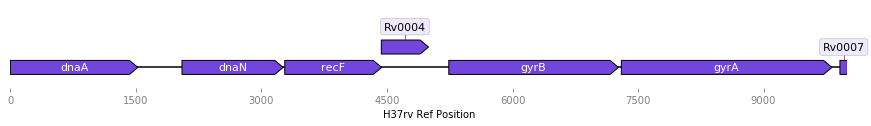

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(15, 1.5), sharex=True)

Start_Coord = 0
End_Coord = 10000
Mtb_H37rv_Graphic_Record_cropped = Mtb_H37rv_Graphic_Record.crop((Start_Coord, End_Coord + 1))
Mtb_H37rv_Graphic_Record_cropped.plot(strand_in_label_threshold=5, ax = axs, plot_sequence = False)

axs.set(xlabel='H37rv Ref Position')
plt.show()

# 3) Read in pickles of processed data (across H37rv)

## Read back in pickle of "dictOf_EBR_31CI_DFs"

In [11]:
PB_Vs_Illumina_DataAnalysis_Dir = "../../../210112_PBvsI_VCeval_AnalysisDir_V7_36CI"

# Define directory for EBR analysis data
PBvIll_EBR_Dir = PB_Vs_Illumina_DataAnalysis_Dir + "/210112_EBR_H37rv_36CI_MM2vsPilon_V7"         

PBvsIll_EBR_IndivSample_NPZs = f"{PBvIll_EBR_Dir}/210112_EBR_H37rv_IndividualSampleRecall_NPZs"


# Parse in aggregated EBR-36CI array
EBR_36CI_WGS40X_NPZ_PATH = f"{PBvIll_EBR_Dir}/210112_EBR_V7_36CI.npz"

EBR_36CI_Array_A4 = np.load(EBR_36CI_WGS40X_NPZ_PATH)["arr_0"]


In [12]:
np.nanmean( EBR_36CI_Array_A4 )

0.9886257598437438

In [13]:
np.isnan(EBR_36CI_Array_A4).sum()

15813

## Read back in pickle of Genmap pileup mappability calculations

In [14]:
Genmap_Map_AnalysisDir = PB_Vs_Illumina_DataAnalysis_Dir + "/201027_Genmap_Mappability_H37rv_V1"  

#ParsedAndPickled_GenmapOutput = f"{Genmap_Map_AnalysisDir}/201027_ParsedAndPickled_GenmapOutput"
#Pickle_PATH_dictOf_GM_PileupMap_Arrays = ParsedAndPickled_GenmapOutput + "/201027_dictOf_GM_PileupMap_Arrays.pickle"   
#with open(Pickle_PATH_dictOf_GM_PileupMap_Arrays, "rb") as f: dictOf_GM_PileupMap_Arrays = pickle.load(f)


# Import numpy array for Pmap_K50_E4
run_Genmap_K50_E4_OutputDir = f"{Genmap_Map_AnalysisDir}/Genmap_Map_K50_E4_Output"
Pmap_K50_E4_NPZ_PATH = f"{run_Genmap_K50_E4_OutputDir}/201027_H37rv_PileupMappability_K50_E4.npz"
Pmap_K50_E4_NPY = np.load(Pmap_K50_E4_NPZ_PATH)["arr_0"]


# Import numpy array for Pmap_K100_E4
run_Genmap_K100_E4_OutputDir = f"{Genmap_Map_AnalysisDir}/Genmap_Map_K100_E4_Output"
Pmap_K100_E4_NPZ_PATH = f"{run_Genmap_K100_E4_OutputDir}/201027_H37rv_PileupMappability_K100_E4.npz"
Pmap_K100_E4_NPY = np.load(Pmap_K100_E4_NPZ_PATH)["arr_0"]



In [15]:
Pmap_K50_E4_NPY.shape

(4411532,)

In [16]:
Pmap_K100_E4_NPY.shape

(4411532,)

In [17]:
# dictOf_GM_PileupMap_Arrays.keys()

## Read in GC content pickles (GC% calculated as a sliding window)

In [18]:
GCcontent_OutputDir = f"{PB_Vs_Illumina_DataAnalysis_Dir}/191217_H37rv_GC_CircGenome_Arrays"

NPZ_PATH_H37rv_GC_10bp_SW_Array = GCcontent_OutputDir + "/191217_H37rv_GC_10bp_SW_Array.npz"   
NPZ_PATH_H37rv_GC_50bp_SW_Array = GCcontent_OutputDir + "/191217_H37rv_GC_50bp_SW_Array.npz"   
NPZ_PATH_H37rv_GC_100bp_SW_Array = GCcontent_OutputDir + "/191217_H37rv_GC_100bp_SW_Array.npz"   

H37rv_GC_10bp_SW_Array = np.load(NPZ_PATH_H37rv_GC_10bp_SW_Array)["arr_0"]
H37rv_GC_50bp_SW_Array = np.load(NPZ_PATH_H37rv_GC_50bp_SW_Array)["arr_0"]
H37rv_GC_100bp_SW_Array = np.load(NPZ_PATH_H37rv_GC_100bp_SW_Array)["arr_0"]


In [19]:
H37rv_GC_10bp_SW_Array

array([60., 60., 60., ..., 40., 50., 50.])

In [20]:
H37rv_GC_50bp_SW_Array

array([56., 56., 58., ..., 54., 56., 58.])

In [21]:
H37rv_GC_100bp_SW_Array

array([59., 60., 59., ..., 59., 60., 60.])

# Import and parse H37rv genome annotations w/ Gene Level analysis

### Read back in EBR and P-mappability H37rv gene level analysis

In [22]:
#Repo_DataDir = "../../Data"


FeatureLevelAnalysis_Dir_O2 = PBvIll_EBR_Dir + "/210113_H37Rv_FeatureLevelAnalysis_EBR_Pmap" 

H37Rv_FeatureLevelAnalysis_EBR_Pmap_TSV_O2_Repo = f"{FeatureLevelAnalysis_Dir_O2}/H37Rv_FeatureLevelAnalysis.EBR_And_Pmap.tsv"
H37Rv_GeneLevelAnalysis_EBR_Pmap_TSV_O2_Repo = f"{FeatureLevelAnalysis_Dir_O2}/H37Rv_FeatureLevelAnalysis.EBR_And_Pmap.Genes.tsv"
H37Rv_IntergenicLevelAnalysis_EBR_Pmap_TSV_O2_Repo = f"{FeatureLevelAnalysis_Dir_O2}/H37Rv_FeatureLevelAnalysis.EBR_And_Pmap.IntergenicRegions.tsv"

FLA_DF = pd.read_csv(H37Rv_FeatureLevelAnalysis_EBR_Pmap_TSV_O2_Repo, sep = "\t",)

GLA_DF = pd.read_csv(H37Rv_GeneLevelAnalysis_EBR_Pmap_TSV_O2_Repo, sep = "\t",)

In [23]:
GLA_DF.head(2)

,Chrom,Start,End,Strand,H37rv_GeneID,Symbol,Feature,ExcludedGroup_Category,PEandPPE_Subfamily,Product,Functional_Category,Is_Pseudogene,Mean_EBR_36CI,gene_PercentPerfect_EBR_36CI,gene_ProportionWith_NANs_EBR_36CI,gene_GC_Content,Mean_PileupMapScore_K50_E4,Mean_PileupMapScore_K100_E4,Mean_PileupMapScore_K125_E4,Length
0,NC_000962.3,0,1524,+,Rv0001,dnaA,CDS,NotExcluded,None,Chromosomal replication initiator protein DnaA,information pathways,No,0.997430,92.979003,0.0,58.923885,1.0,1.0,1.0,1524
1,NC_000962.3,2051,3260,+,Rv0002,dnaN,CDS,NotExcluded,None,DNA polymerase III (beta chain) DnaN (DNA nucl...,information pathways,No,0.998093,93.134822,0.0,59.966915,1.0,1.0,1.0,1209


# Defining Plotting Functions

In [24]:
def plot_GenomeLocation_EBR_GC(Start_Coord, End_Coord, ax_List):

    Mtb_H37rv_Graphic_Record_cropped = Mtb_H37rv_Graphic_Record.crop((Start_Coord, End_Coord + 1))

    Mtb_H37rv_Graphic_Record_cropped.plot(strand_in_label_threshold=5, ax = ax_List[0], plot_sequence = False)

    pos_Coords_1 = np.arange(Start_Coord, End_Coord + 1)
    EBR_36CI_Array_Subset = EBR_36CI_Array_A4[Start_Coord: End_Coord + 1]

    ax_List[1].fill_between(pos_Coords_1, EBR_36CI_Array_Subset, alpha=1, color = "#3A4C92")
    ax_List[1].set_ylabel('EBR (36 Isolates)', fontsize = 12)

    ax_List[2].fill_between(pos_Coords_1,
                     H37rv_GC_50bp_SW_Array[Start_Coord: End_Coord + 1],
                     alpha=1, color="#FDDB91")
    
    ax_List[2].set_ylim(40, 90)
    ax_List[2].set_xlabel('H37Rv Ref Position', fontsize = 14)
    ax_List[2].set_ylabel('GC% (50 bp window)', fontsize = 14)
    
    #plt.show()

In [25]:
def plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, ax_List):

    Mtb_H37rv_Graphic_Record_cropped = Mtb_H37rv_Graphic_Record.crop((Start_Coord, End_Coord + 1))

    Mtb_H37rv_Graphic_Record_cropped.plot(strand_in_label_threshold=5, ax = ax_List[0], plot_sequence = False)

    pos_Coords_1 = np.arange(Start_Coord, End_Coord + 1)
    EBR_36CI_Array_Subset = EBR_36CI_Array_A4[Start_Coord: End_Coord + 1]

    ax_List[1].fill_between(pos_Coords_1, EBR_36CI_Array_Subset, alpha=1, color = "#3A4C92")
    ax_List[1].set_ylabel('EBR (36 Isolates)', fontsize = 14)
    
    
    GM_K50_E4 = Pmap_K50_E4_NPY[Start_Coord: End_Coord + 1]

    ax_List[2].fill_between(pos_Coords_1, GM_K50_E4, alpha = 1, color = "#E76754")
    ax_List[2].set_ylabel('Pileup Mappability \n (K = 50 bp, E = 4)', fontsize = 12)

    
    ax_List[3].fill_between(pos_Coords_1,
                     H37rv_GC_50bp_SW_Array[Start_Coord: End_Coord + 1],
                     alpha=1, color="#FDDB91")
    
    ax_List[3].set_ylim(40, 90)
    ax_List[3].set_xlabel('H37Rv Ref Position', fontsize = 14)
    ax_List[3].set_ylabel('GC% \n (50 bp window)', fontsize = 14)
    #plt.show()
    
    

In [26]:
GLA_DF.head()

,Chrom,Start,End,Strand,H37rv_GeneID,Symbol,Feature,ExcludedGroup_Category,PEandPPE_Subfamily,Product,Functional_Category,Is_Pseudogene,Mean_EBR_36CI,gene_PercentPerfect_EBR_36CI,gene_ProportionWith_NANs_EBR_36CI,gene_GC_Content,Mean_PileupMapScore_K50_E4,Mean_PileupMapScore_K100_E4,Mean_PileupMapScore_K125_E4,Length
0,NC_000962.3,0,1524,+,Rv0001,dnaA,CDS,NotExcluded,None,Chromosomal replication initiator protein DnaA,information pathways,No,0.997430,92.979003,0.0,58.923885,1.0,1.0,1.0,1524
1,NC_000962.3,2051,3260,+,Rv0002,dnaN,CDS,NotExcluded,None,DNA polymerase III (beta chain) DnaN (DNA nucl...,information pathways,No,0.998093,93.134822,0.0,59.966915,1.0,1.0,1.0,1209
2,NC_000962.3,3279,4437,+,Rv0003,recF,CDS,NotExcluded,None,DNA replication and repair protein RecF (singl...,information pathways,No,1.000000,100.000000,0.0,59.930915,1.0,1.0,1.0,1158
3,NC_000962.3,4433,4997,+,Rv0004,Rv0004,CDS,NotExcluded,None,Conserved hypothetical protein,conserved hypotheticals,No,1.000000,100.000000,0.0,66.134752,1.0,1.0,1.0,564
4,NC_000962.3,5239,7267,+,Rv0005,gyrB,CDS,NotExcluded,None,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,information pathways,No,1.000000,100.000000,0.0,60.207101,1.0,1.0,1.0,2028


# Visualization of genome regions

In [27]:
!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/

mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/’: File exists


### Visualize InhA

1673801 1675411
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/inhA/’: File exists


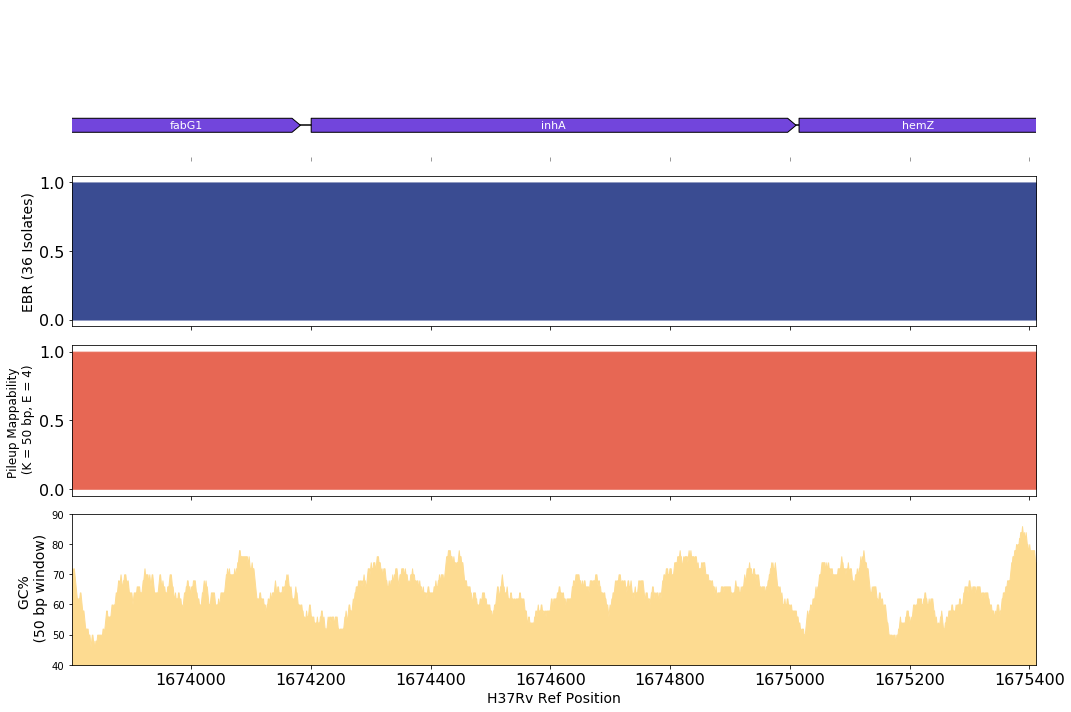

In [28]:
target_Gene_Symbol = "inhA"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol/

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

1673801 1675411
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/inhA/’: File exists


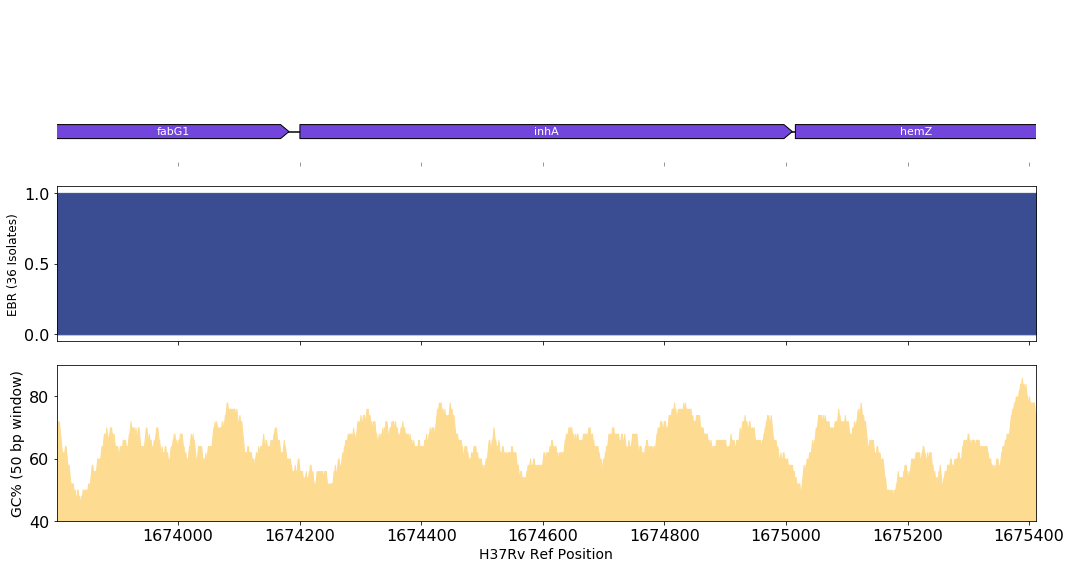

In [29]:
target_Gene_Symbol = "inhA"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(3, 1, figsize=(15, 8), sharex=True)

plot_GenomeLocation_EBR_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol/

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

### Visualize rpoB

759406 763725
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/rpoB’: File exists


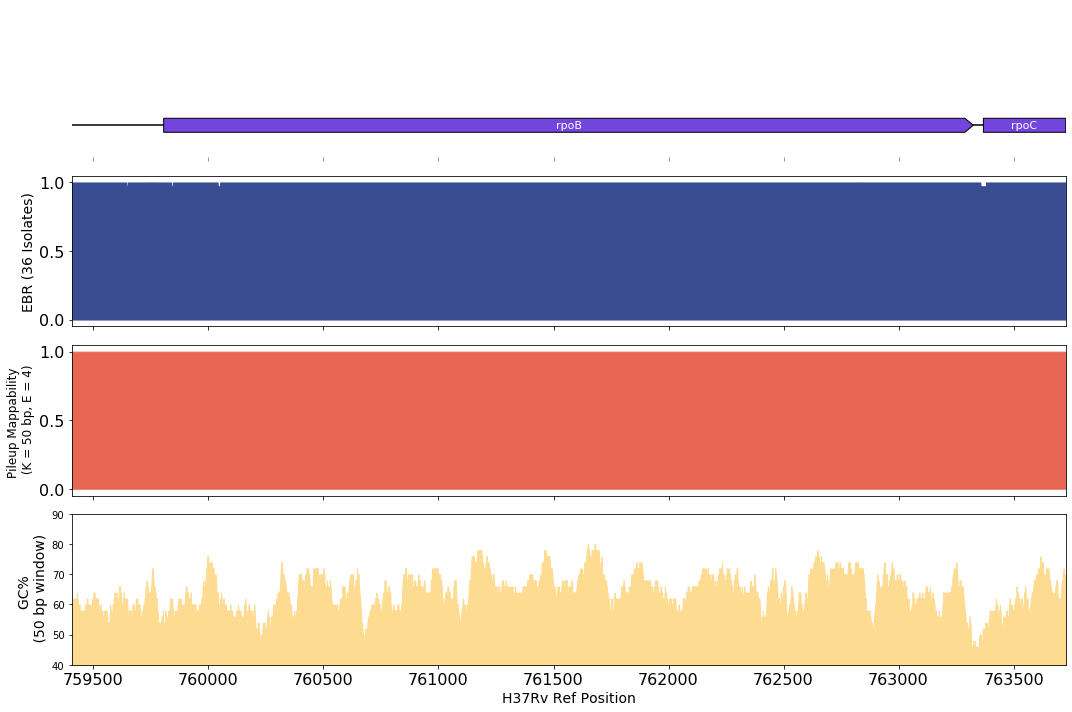

In [30]:
target_Gene_Symbol = "rpoB"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

### Visualize gyrA

6901 10218
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/gyrA’: File exists


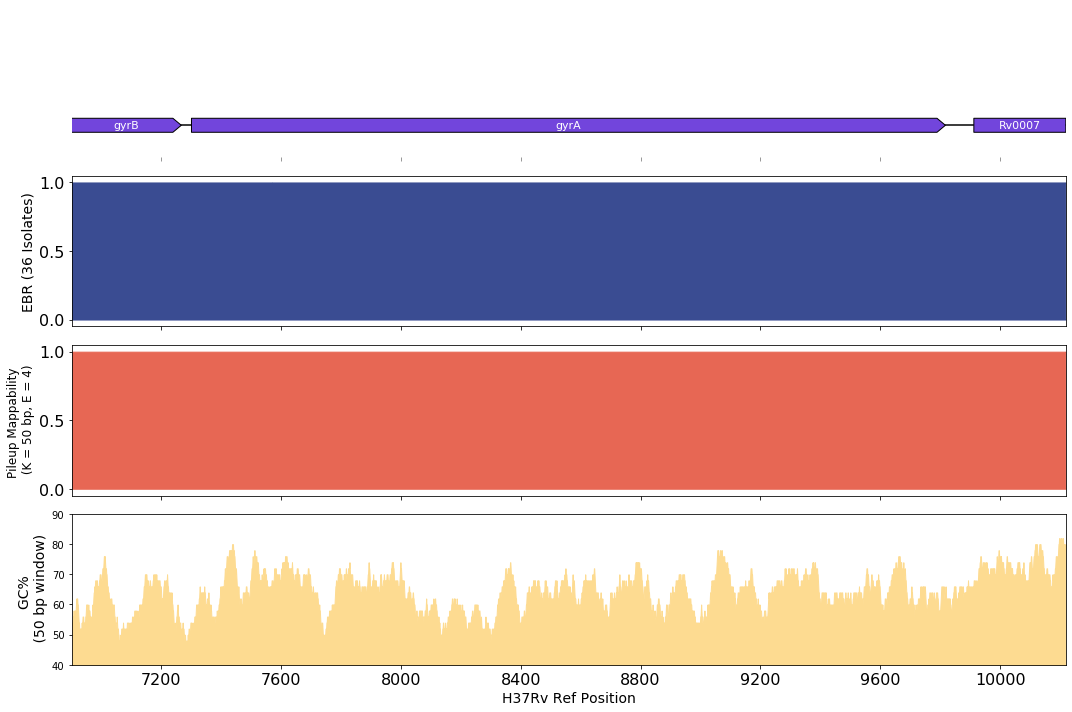

In [31]:
target_Gene_Symbol = "gyrA"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

In [32]:
GeneOfInterest_DF.head()

,Chrom,Start,End,Strand,H37rv_GeneID,Symbol,Feature,ExcludedGroup_Category,PEandPPE_Subfamily,Product,Functional_Category,Is_Pseudogene,Mean_EBR_36CI,gene_PercentPerfect_EBR_36CI,gene_ProportionWith_NANs_EBR_36CI,gene_GC_Content,Mean_PileupMapScore_K50_E4,Mean_PileupMapScore_K100_E4,Mean_PileupMapScore_K125_E4,Length
5,NC_000962.3,7301,9818,+,Rv0006,gyrA,CDS,NotExcluded,None,DNA gyrase (subunit A) GyrA (DNA topoisomerase...,information pathways,No,0.999989,99.96027,0.0,63.885578,1.0,1.0,1.0,2517


### Visualize PE_PGRS54

3930604 3937110
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/PE_PGRS54’: File exists


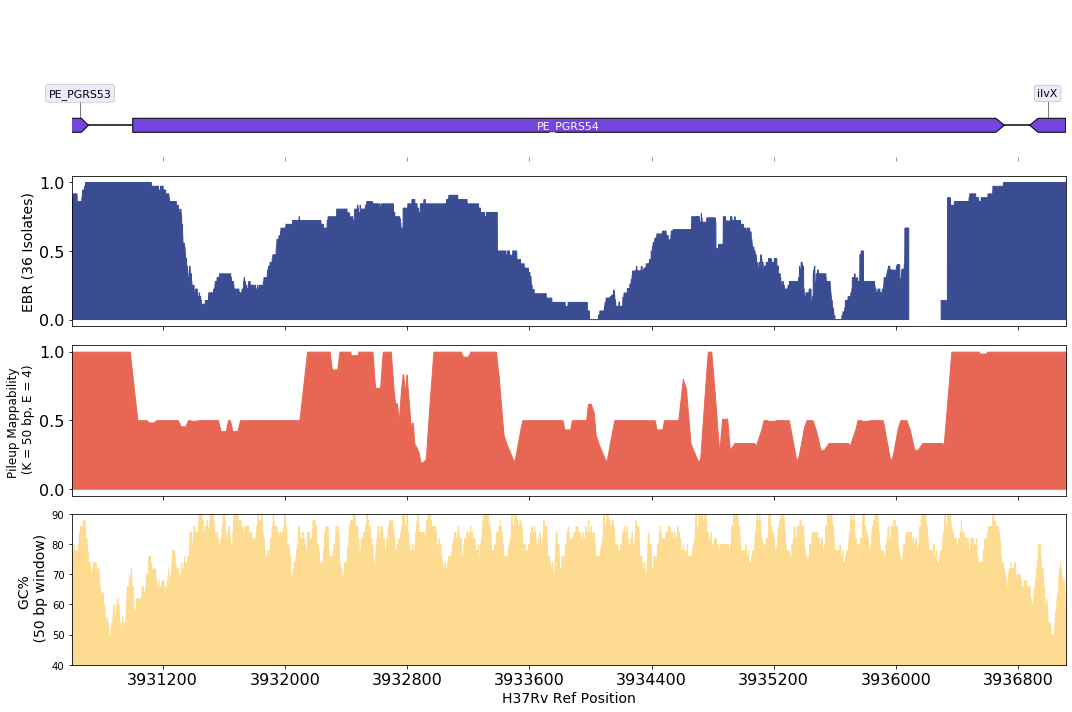

In [33]:
target_Gene_Symbol = "PE_PGRS54"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

3930604 3937110
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/PE_PGRS54/’: File exists


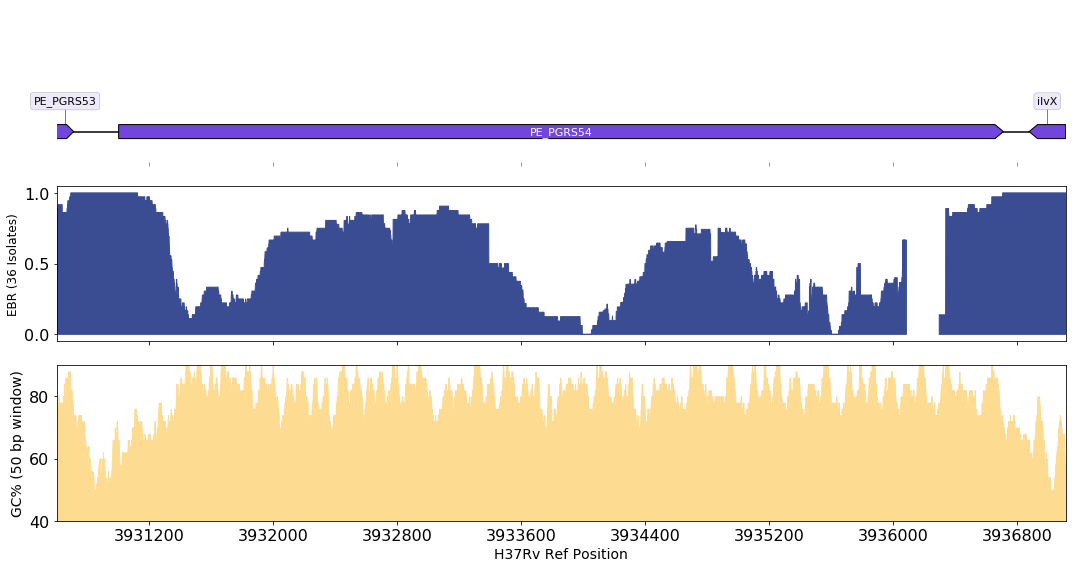

In [34]:
target_Gene_Symbol = "PE_PGRS54"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(3, 1, figsize=(15, 8), sharex=True)

plot_GenomeLocation_EBR_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol/

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

In [35]:
GeneOfInterest_DF.head()

,Chrom,Start,End,Strand,H37rv_GeneID,Symbol,Feature,ExcludedGroup_Category,PEandPPE_Subfamily,Product,Functional_Category,Is_Pseudogene,Mean_EBR_36CI,gene_PercentPerfect_EBR_36CI,gene_ProportionWith_NANs_EBR_36CI,gene_GC_Content,Mean_PileupMapScore_K50_E4,Mean_PileupMapScore_K100_E4,Mean_PileupMapScore_K125_E4,Length
3648,NC_000962.3,3931004,3936710,+,Rv3508,PE_PGRS54,CDS,PE/PPEs,PE_V_PGRS,PE-PGRS family protein PE_PGRS54,PE/PPE,No,0.533376,2.225727,0.036979,80.529267,0.583865,0.662627,0.68047,5706


## Visualize the area surrounding PE_PGRS53 - PE_PGRS57

3901004 3966710
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/PE_PGRS54’: File exists


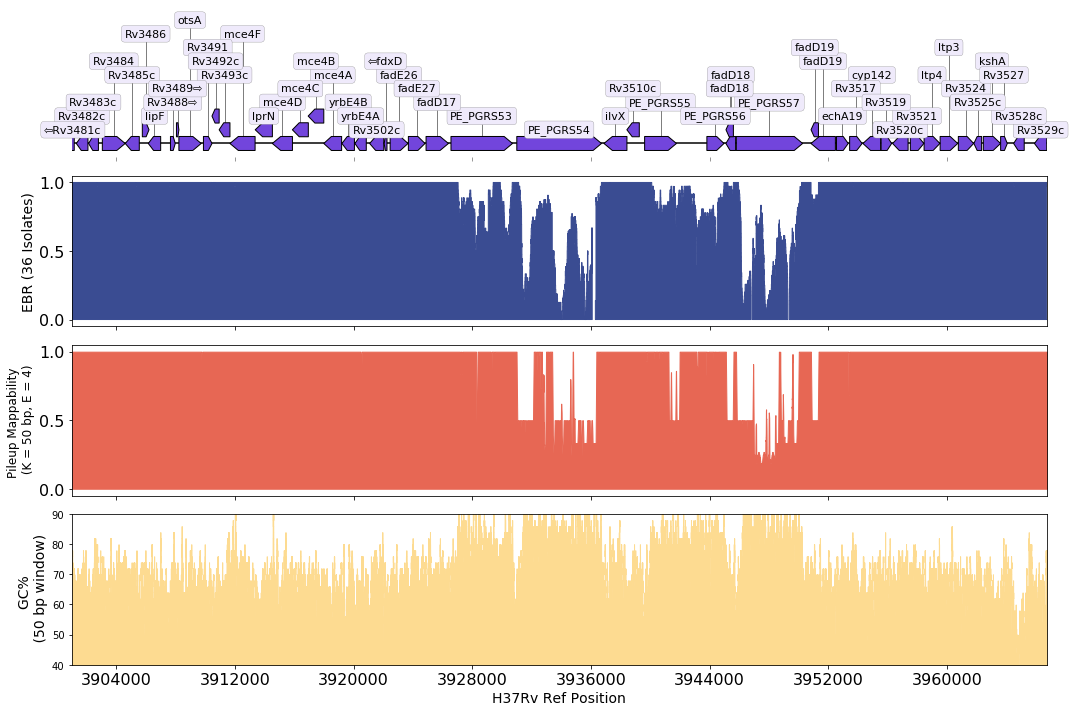

In [36]:

target_Gene_Symbol = "PE_PGRS54"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 30000
End_Coord = End_GeneOfInterest + 30000

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize = 16)
axs[2].tick_params(axis='y', labelsize = 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/BigAreaNear_{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/BigAreaNear_{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/BigAreaNear_{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

4350674 4352581
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/PPE68’: File exists


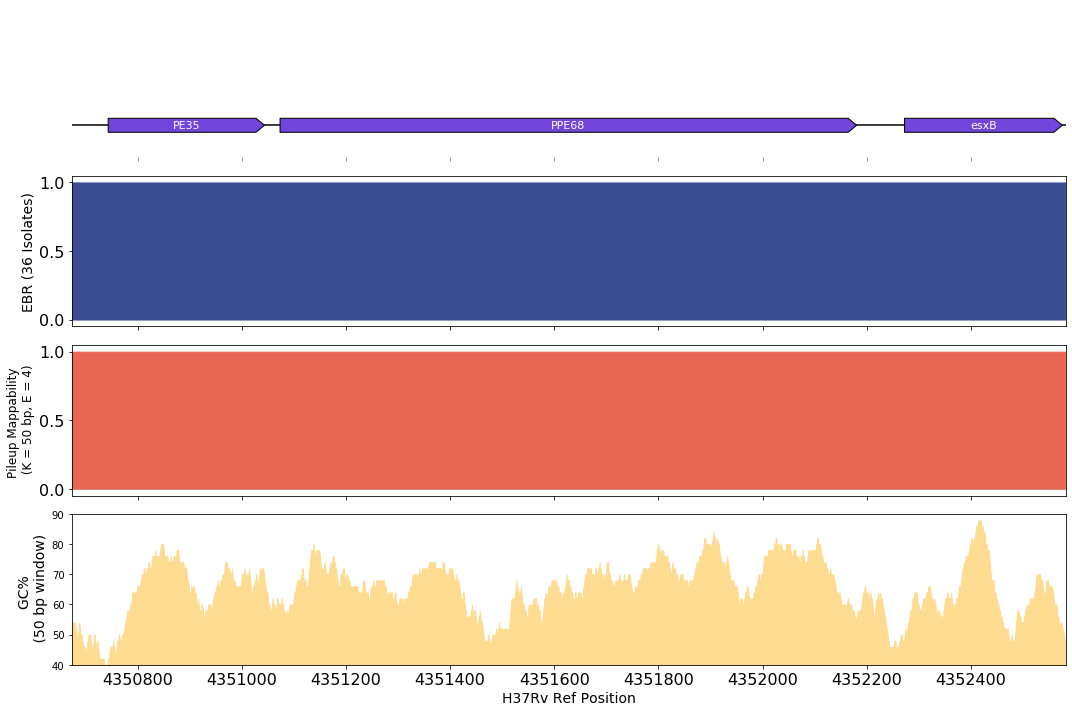

In [37]:
target_Gene_Symbol = "PPE68"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

### Visualize PPE43

3076493 3078478
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/PPE43’: File exists


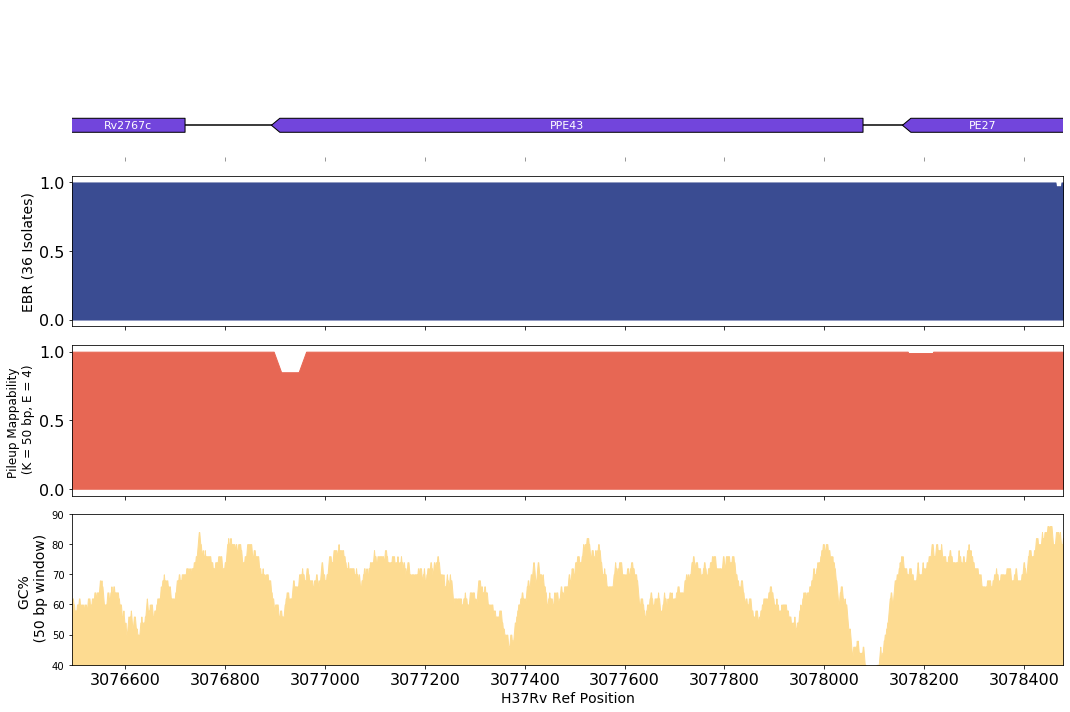

In [38]:
target_Gene_Symbol = "PPE43"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

### Visualize PE_PGRS57

3945393 3950663
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/PE_PGRS57’: File exists


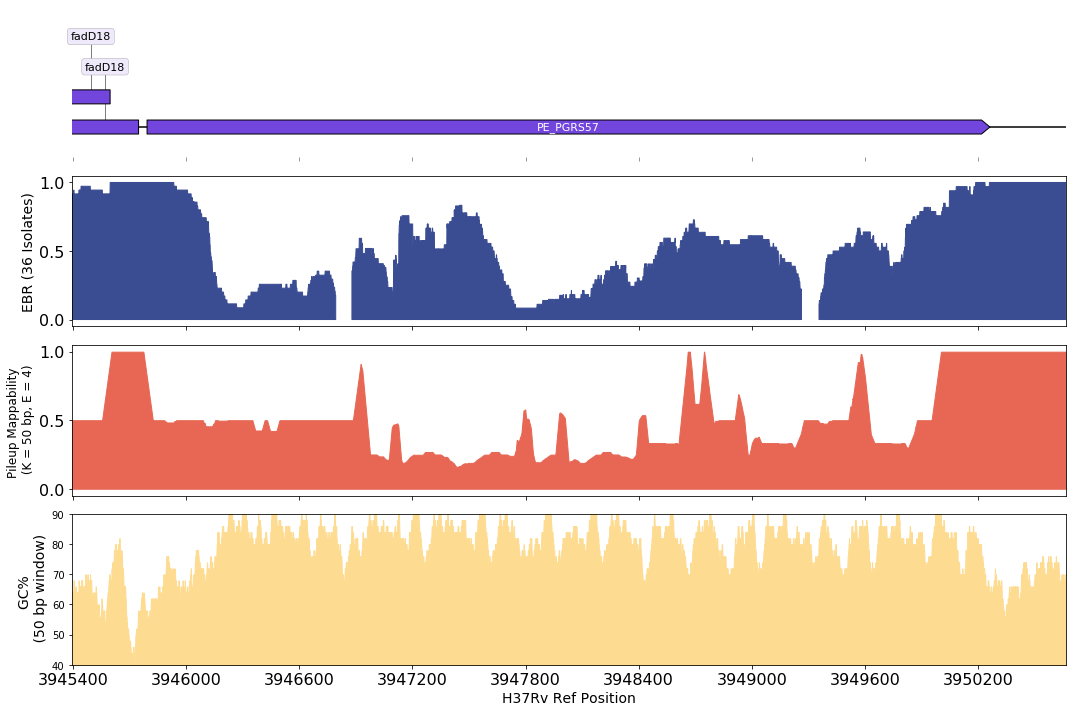

In [39]:
target_Gene_Symbol = "PE_PGRS57"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

### Visualize Rv2648 (IS6110 Transposon)

2971759 2973886


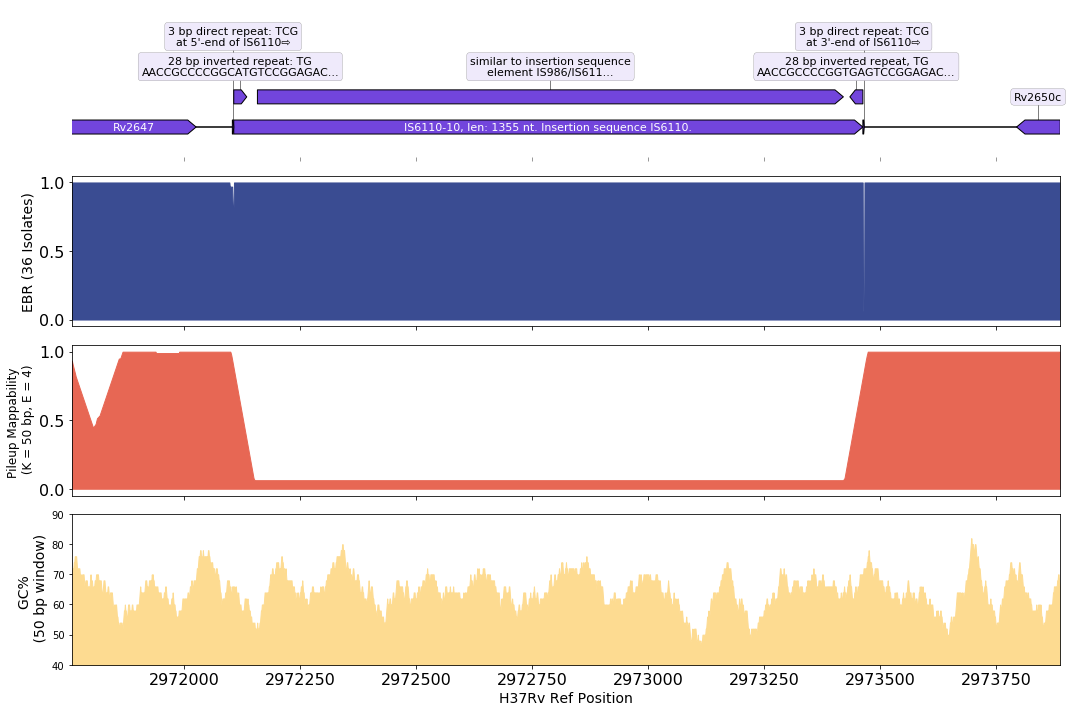

In [40]:
target_Gene_Symbol = "Rv2648"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 1400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir -p ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_IS6110_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_IS6110_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_IS6110_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

### Visualize esxW

4059294 4061791
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/esxW’: File exists


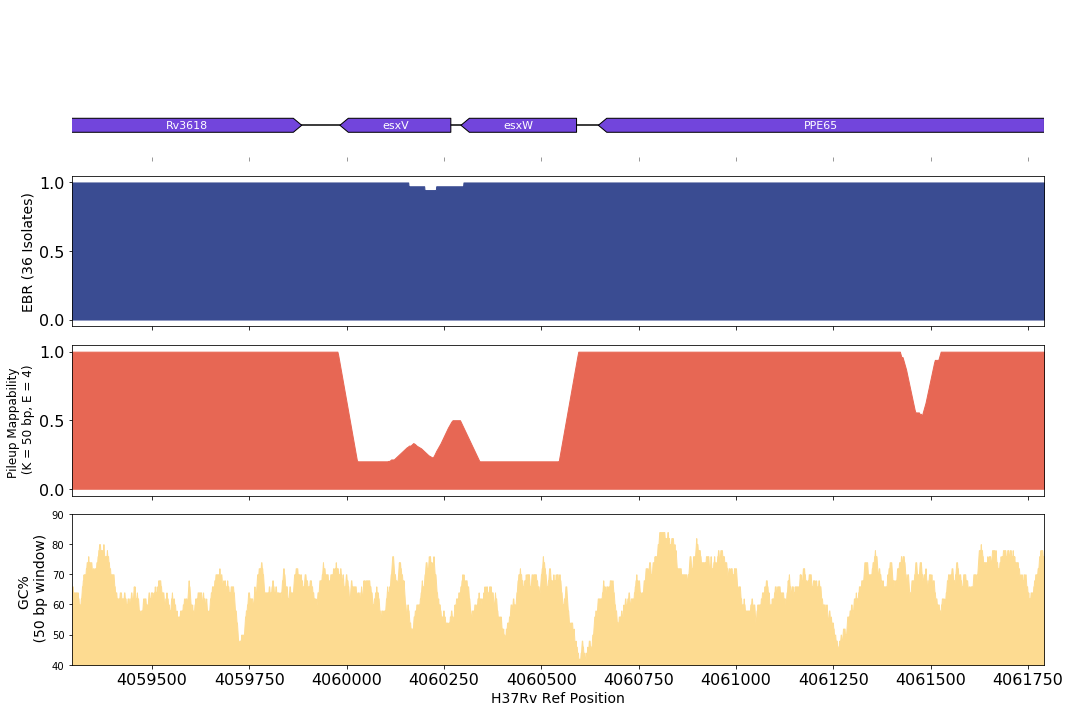

In [41]:
target_Gene_Symbol = "esxW"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 1000
End_Coord = End_GeneOfInterest + 1200

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

### Visualize PPE26

2026389 2028371
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/PPE26’: File exists


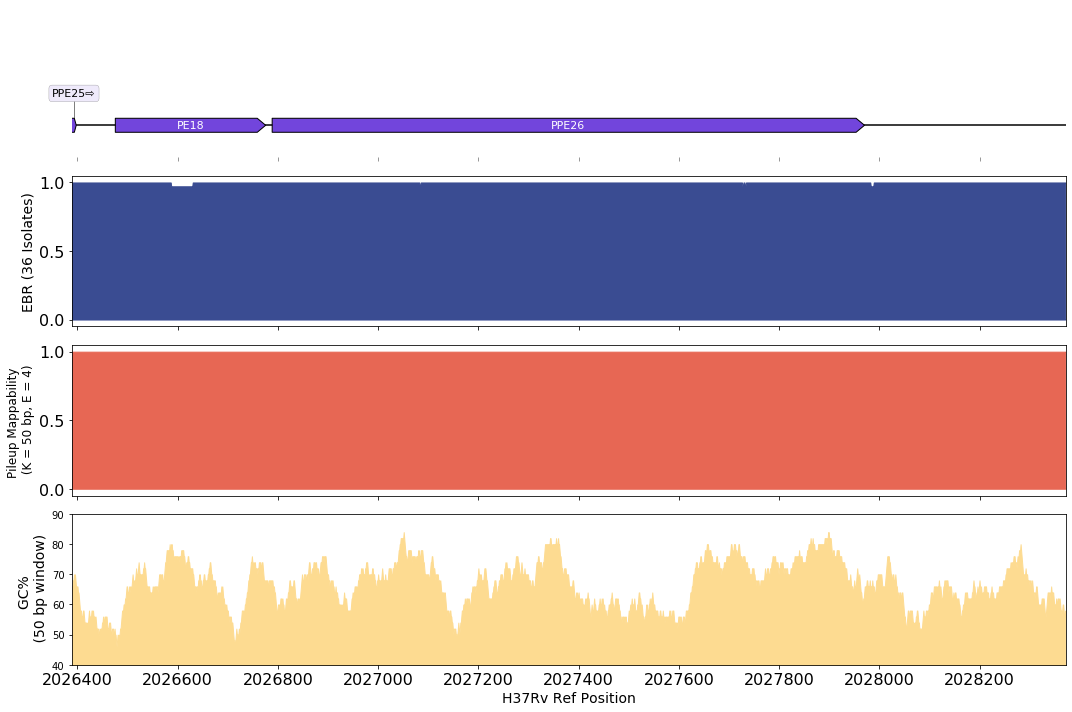

In [42]:
target_Gene_Symbol = "PPE26"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

### Visualize PPE33

2050881 2053088
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/PPE33’: File exists


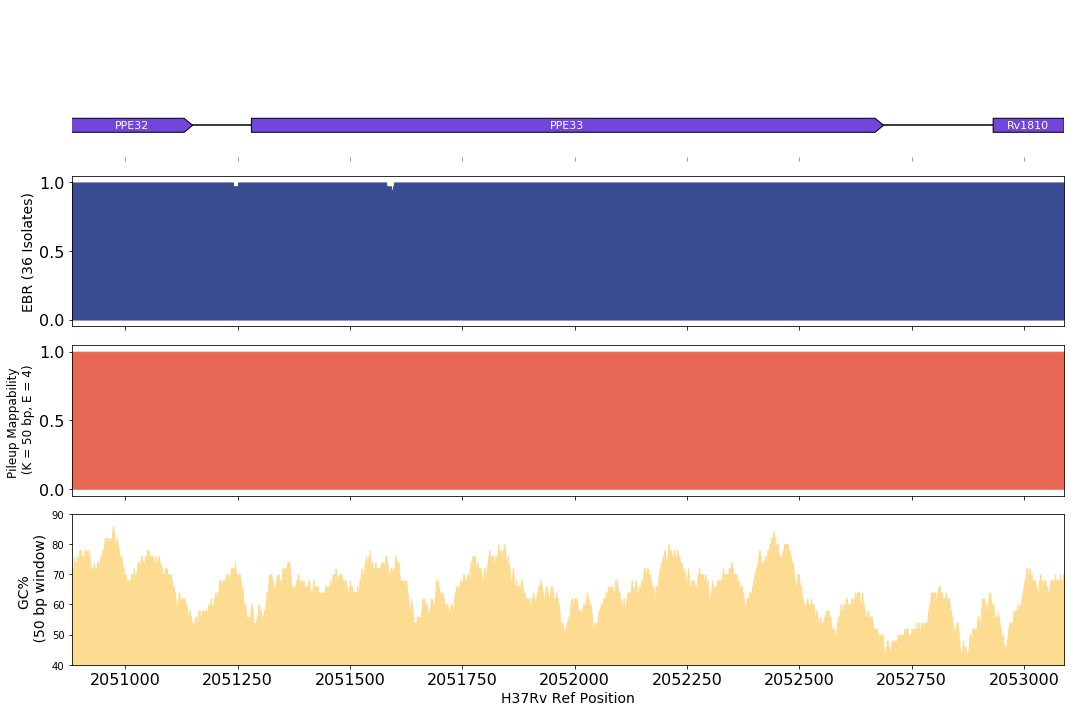

In [43]:
target_Gene_Symbol = "PPE33"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

### Visualize PPE43

3076493 3078478
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/PPE43’: File exists


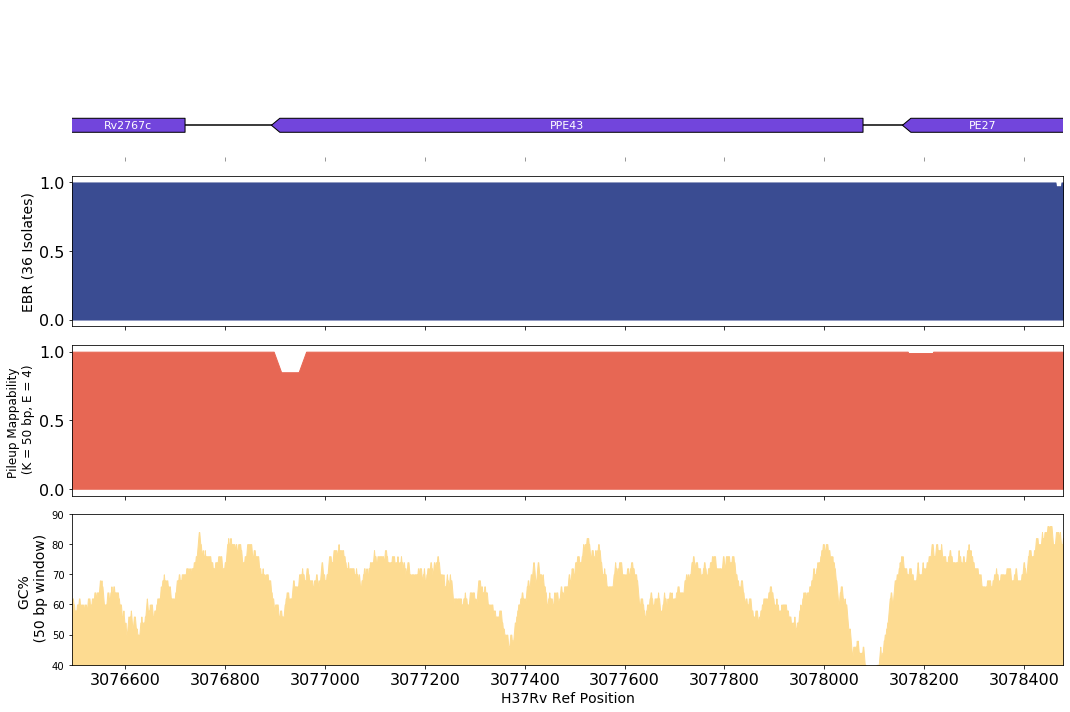

In [44]:
target_Gene_Symbol = "PPE43"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

## Visualize PPE60

3894025 3896007
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/PPE60’: File exists


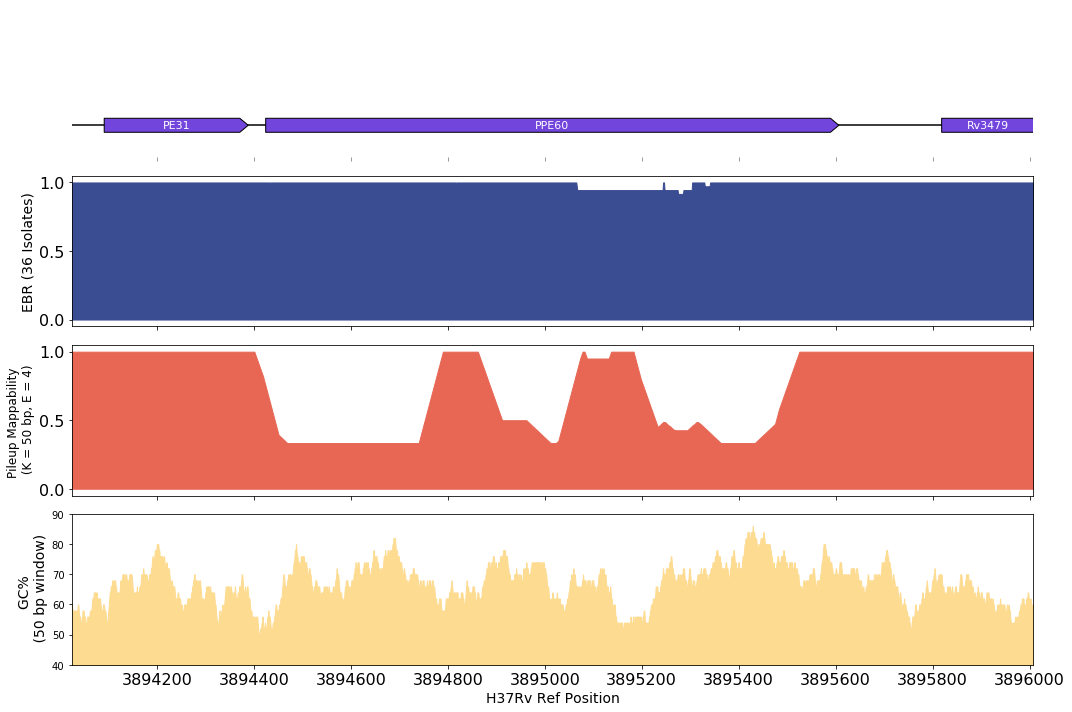

In [45]:
target_Gene_Symbol = "PPE60"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

## Visualize pks12

2294130 2307386
mkdir: cannot create directory ‘./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/pks12’: File exists


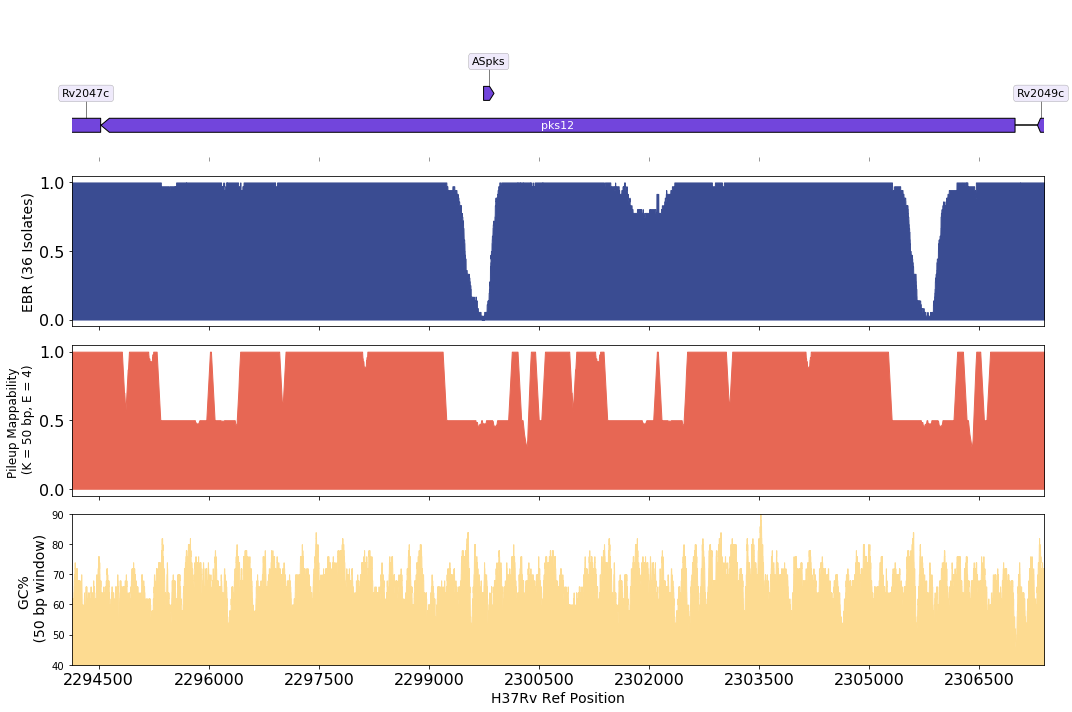

In [46]:
target_Gene_Symbol = "pks12"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

2866723 2868186


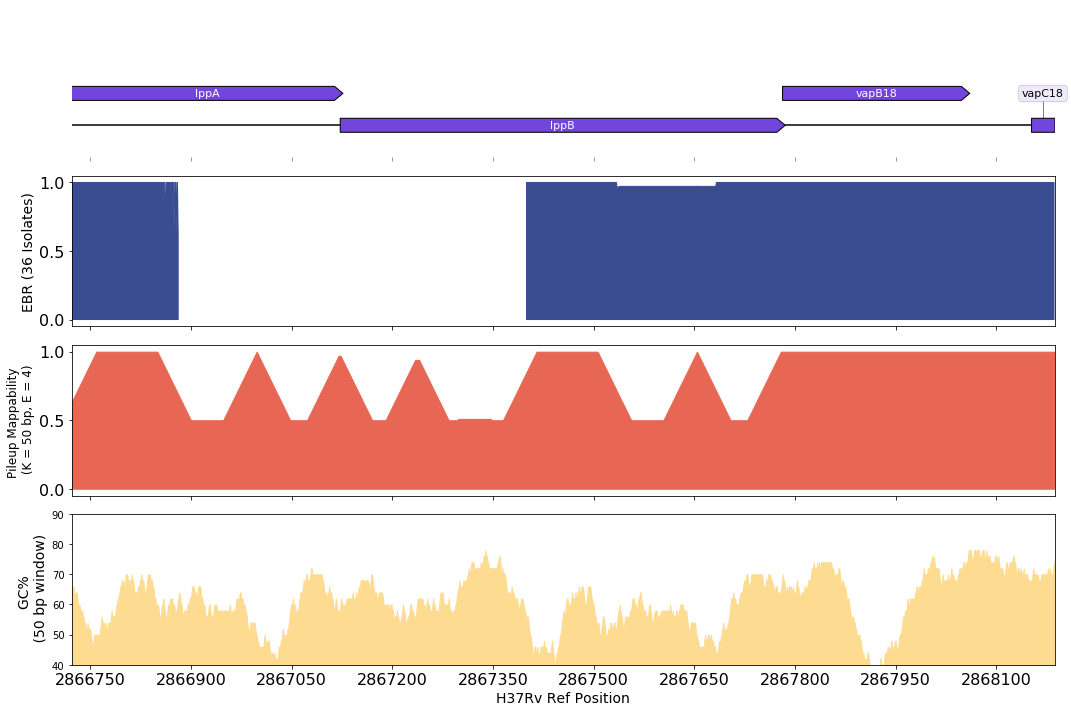

In [47]:
target_Gene_Symbol = "lppB"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

4230919 4232793


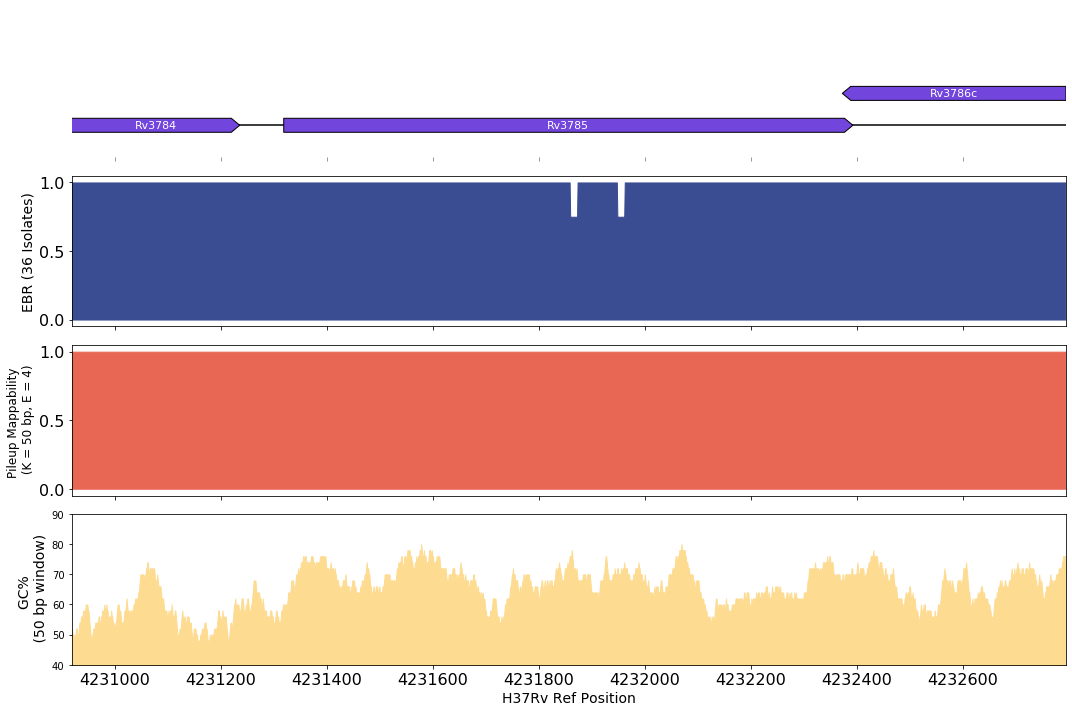

In [48]:
target_Gene_Symbol = "Rv3785"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

3743310 3753584


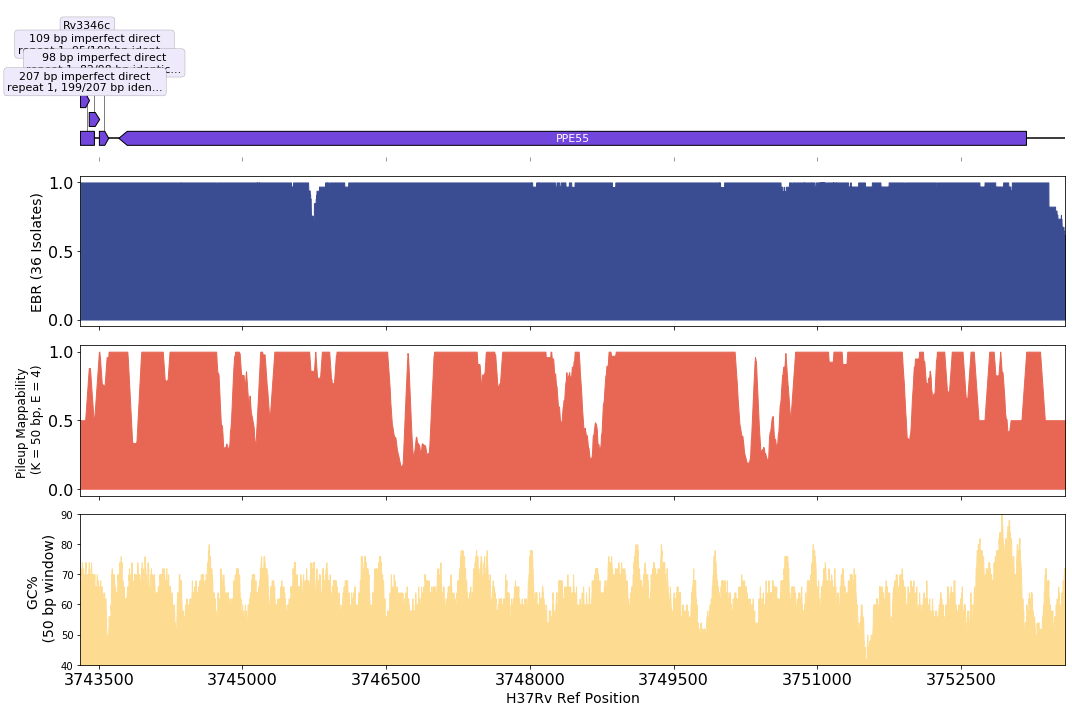

In [49]:
target_Gene_Symbol = "PPE55"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()

365749 373164


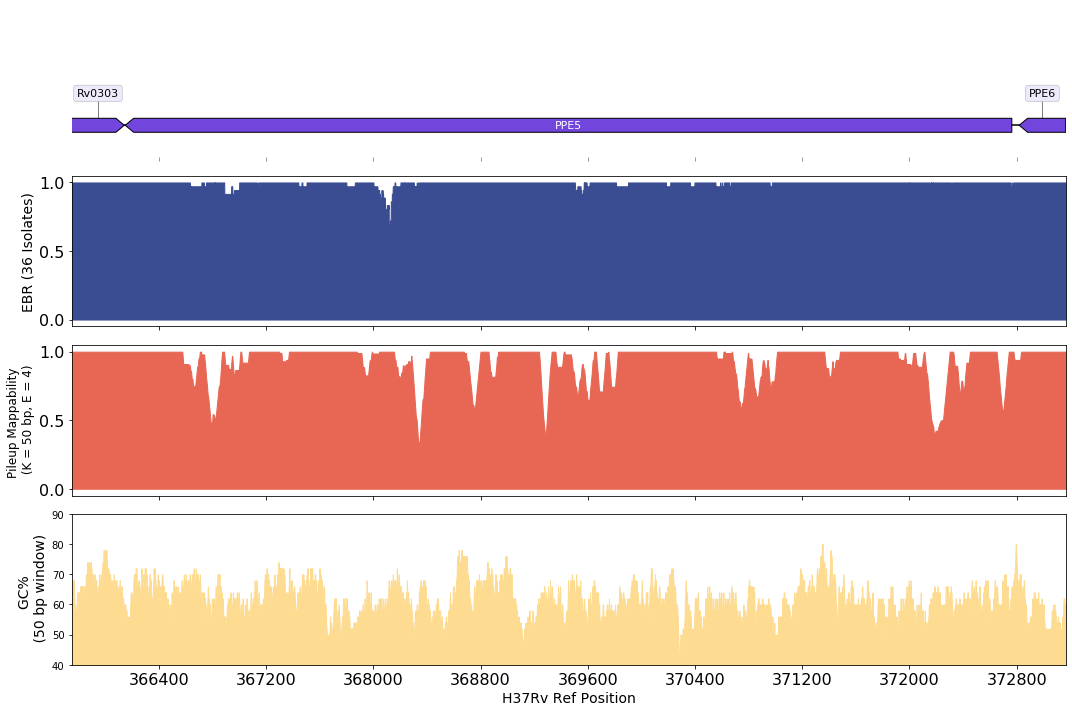

In [50]:
target_Gene_Symbol = "PPE5"

GeneOfInterest_DF = GLA_DF[GLA_DF["Symbol"] == target_Gene_Symbol]

Start_GeneOfInterest = GeneOfInterest_DF["Start"].values[0]
End_GeneOfInterest = GeneOfInterest_DF["End"].values[0]

Start_Coord = Start_GeneOfInterest - 400
End_Coord = End_GeneOfInterest + 400

print(Start_Coord, End_Coord)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

plot_GenomeLocation_EBR_K50E4_GC(Start_Coord, End_Coord, axs)


plt.xticks(fontsize=16)
#plt.yticks(fontsize=14)
axs[1].tick_params(axis='y', labelsize= 16)
axs[2].tick_params(axis='y', labelsize= 16)


plt.tight_layout()

!mkdir ./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/$target_Gene_Symbol

#plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.png", dpi = 125)  
#plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.pdf", transparent=True)               
#plt.savefig(f"./EBR_And_Pmap_Metrics_PlottedAlongTheGenome/{target_Gene_Symbol}/{target_Gene_Symbol}_EBR_36CI_K50E4_GC_{Start_Coord}_{Start_Coord}.svg", transparent=True)               

plt.show()